# Synthetic Dataset

In [11]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from matplotlib.ticker import MaxNLocator
random_state = 9

In [12]:
features, true_labels = make_blobs(
    n_samples=9000,
    centers=9,
    cluster_std=3,
    random_state=random_state
)
features[:5]

array([[-3.04237128, 10.93766901],
       [ 8.42209625, -4.20246023],
       [-4.36266005,  5.12331112],
       [-9.68350791, -4.45600546],
       [ 8.67570452,  0.43090851]])

In [13]:
true_labels[:10]

array([5, 6, 5, 4, 7, 3, 1, 0, 1, 1])

In [14]:
features = StandardScaler().fit_transform(features)

In [15]:
kmeans = KMeans(init='random', n_clusters=9, n_init=30, random_state=random_state, max_iter=500)
kmeans.fit(features)
predicted_labels = kmeans.labels_
predicted_labels[:10]

array([8, 5, 8, 2, 5, 0, 3, 4, 3, 3], dtype=int32)

Text(0.5, 1.0, 'KMeans Clustering')

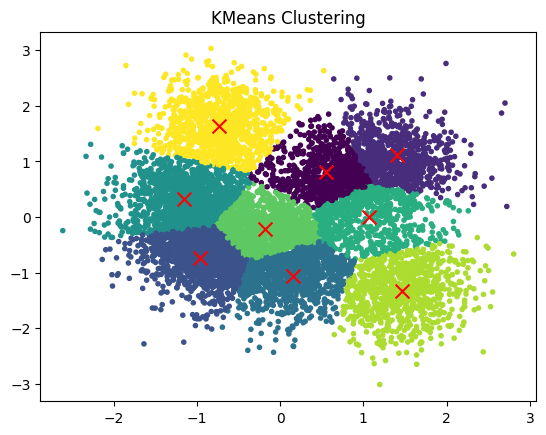

In [16]:
#cluster plot
fig, ax = plt.subplots()
ax.scatter(features[:, 0], features[:, 1], c=predicted_labels, s=9, cmap='viridis')
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='x')
ax.set_title('KMeans Clustering')

In [17]:
print(kmeans.inertia_)
print(davies_bouldin_score(features, predicted_labels))
print(silhouette_score(features, predicted_labels))

2174.6353754547786
0.8452047815435274
0.36072066414883036


optimal number of clusters: 5


<Figure size 1000x600 with 0 Axes>

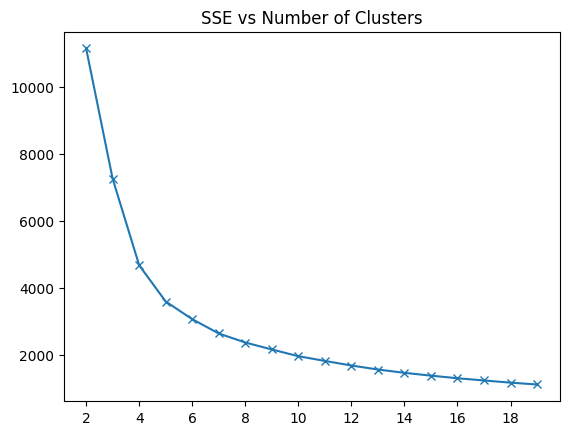

In [18]:
# min sse
sse = []
sil_scores = []
clusters = []
davies_bouldin_scores = []
for k in range(2, 20):
    kmeans = KMeans(init='random', n_clusters=k, n_init=30, random_state=random_state, max_iter=500)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)
    predicted_labels = kmeans.labels_
    sil_scores.append(silhouette_score(features, predicted_labels))
    clusters.append(k)
    davies_bouldin_scores.append(davies_bouldin_score(features, predicted_labels))
#plot
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('SSE vs Number of Clusters')
ax.plot(range(2, 20), sse, marker='x')
print(f"optimal number of clusters: {5}")

maximum silhouette score: 0.4238289915682615 at 4 clusters


<Figure size 1000x600 with 0 Axes>

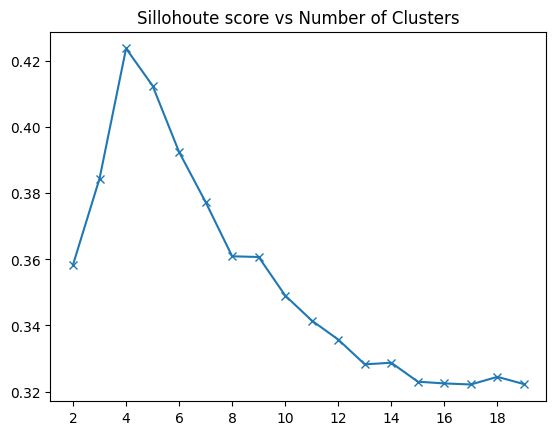

In [19]:
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Sillohoute score vs Number of Clusters')
ax.plot(range(2, 20), sil_scores, marker='x')
print(f'maximum silhouette score: {max(sil_scores)} at {clusters[sil_scores.index(max(sil_scores))]} clusters')

In [20]:
davies_bouldin_scores

[np.float64(1.153524787009593),
 np.float64(0.8893481092710322),
 np.float64(0.7596696079027458),
 np.float64(0.7819598073950339),
 np.float64(0.8257256038982498),
 np.float64(0.8265532054385264),
 np.float64(0.8808770399151935),
 np.float64(0.8452047815435274),
 np.float64(0.8588020358648603),
 np.float64(0.8916092262714947),
 np.float64(0.8921961325130022),
 np.float64(0.9106873359773383),
 np.float64(0.9090169860569739),
 np.float64(0.9225159795680226),
 np.float64(0.9251089536683645),
 np.float64(0.9000696465442334),
 np.float64(0.883816047903639),
 np.float64(0.8794110925192578)]

# Real Dataset

In [21]:
df = pd.read_csv('earthquake_alert_balanced_dataset.csv')
df.head()

,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green


In [22]:
df['alert'].value_counts()

alert
green     325
yellow    325
orange    325
red       325
Name: count, dtype: int64

In [ ]:
# Label encode the 'alert' column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['alert_encoded'] = le.fit_transform(df['alert'])

# Display the mapping
print("Alert mapping:")
for i, label in enumerate(le.classes_):
    print(f"{label} -> {i}")
    
df[['alert', 'alert_encoded']].head(10)

In [ ]:
# Check dataset info
df.info()

In [ ]:
# Select features for clustering (excluding the target variable 'alert')
feature_cols = [col for col in df.columns if col not in ['alert', 'alert_encoded']]
X = df[feature_cols]
X.head()

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"Features shape: {X_scaled.shape}")

In [ ]:
# Determine optimal number of clusters using Elbow Method
sse_real = []
sil_scores_real = []
davies_bouldin_scores_real = []
k_range = range(2, 15)

for k in k_range:
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=30, random_state=random_state, max_iter=500)
    kmeans.fit(X_scaled)
    sse_real.append(kmeans.inertia_)
    predicted_labels = kmeans.labels_
    sil_scores_real.append(silhouette_score(X_scaled, predicted_labels))
    davies_bouldin_scores_real.append(davies_bouldin_score(X_scaled, predicted_labels))

print("Analysis complete!")

In [ ]:
# Plot Elbow Method (SSE)
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(k_range, sse_real, marker='o', color='blue')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('SSE')
ax.set_title('Elbow Method - SSE vs Number of Clusters (Earthquake Dataset)')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Plot Silhouette Score
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(k_range, sil_scores_real, marker='o', color='green')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Score vs Number of Clusters (Earthquake Dataset)')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

optimal_k_sil = list(k_range)[sil_scores_real.index(max(sil_scores_real))]
print(f'Maximum silhouette score: {max(sil_scores_real):.4f} at {optimal_k_sil} clusters')

In [ ]:
# Plot Davies-Bouldin Score
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(k_range, davies_bouldin_scores_real, marker='o', color='red')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Davies-Bouldin Score')
ax.set_title('Davies-Bouldin Score vs Number of Clusters (Earthquake Dataset)')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

optimal_k_db = list(k_range)[davies_bouldin_scores_real.index(min(davies_bouldin_scores_real))]
print(f'Minimum Davies-Bouldin score: {min(davies_bouldin_scores_real):.4f} at {optimal_k_db} clusters')

In [ ]:
# Apply KMeans with optimal number of clusters (based on silhouette score)
optimal_k = optimal_k_sil
kmeans_final = KMeans(init='k-means++', n_clusters=optimal_k, n_init=30, random_state=random_state, max_iter=500)
kmeans_final.fit(X_scaled)
df['cluster'] = kmeans_final.labels_

print(f"Final clustering with {optimal_k} clusters")
print(f"Inertia (SSE): {kmeans_final.inertia_:.4f}")
print(f"Silhouette Score: {silhouette_score(X_scaled, kmeans_final.labels_):.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin_score(X_scaled, kmeans_final.labels_):.4f}")

In [ ]:
# Cluster distribution
print("Cluster distribution:")
print(df['cluster'].value_counts().sort_index())

In [ ]:
# Visualize clusters (using first 2 principal components for 2D visualization)
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=random_state)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], s=20, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.title(f'KMeans Clustering Visualization (k={optimal_k}) - Earthquake Dataset')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Compare clusters with actual alert levels
comparison = pd.crosstab(df['cluster'], df['alert'])
print("Cluster vs Alert Level:")
print(comparison)

In [ ]:
# Heatmap of cluster vs alert
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(comparison, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Cluster vs Alert Level Heatmap')
plt.xlabel('Alert Level')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()